# 1-Data Pre-processing 

In [35]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder



In [48]:
# Importing data
df = pd.read_csv("../data/train.csv")
df.shape

(7713, 16)

In [50]:
df.info()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


### Change column values

In [38]:
# Filter all the rows that have duration value less than "30"
df.loc[(df['duration_in min/ms'] < 30)]['duration_in min/ms']

7        3.105783
10       4.330450
13       4.440250
25       4.015633
34       3.503783
           ...   
17952    5.407783
17959    3.686017
17974    3.408667
17986    4.392883
17988    3.787783
Name: duration_in min/ms, Length: 2580, dtype: float64

In [39]:
condition = df['duration_in min/ms'] < 30 

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in min/ms'] = df.loc[condition,'duration_in min/ms']*60000

In [40]:
df.rename(columns={"duration_in min/ms": "duration_in_ms"}, inplace=True)

## Checking for duplicates

In [41]:
df.duplicated().sum()

3

In [42]:
df = df.drop_duplicates()
df.shape

(17993, 17)

## Columns with NaN values
- Popularity
- key                 
- instrumentalness

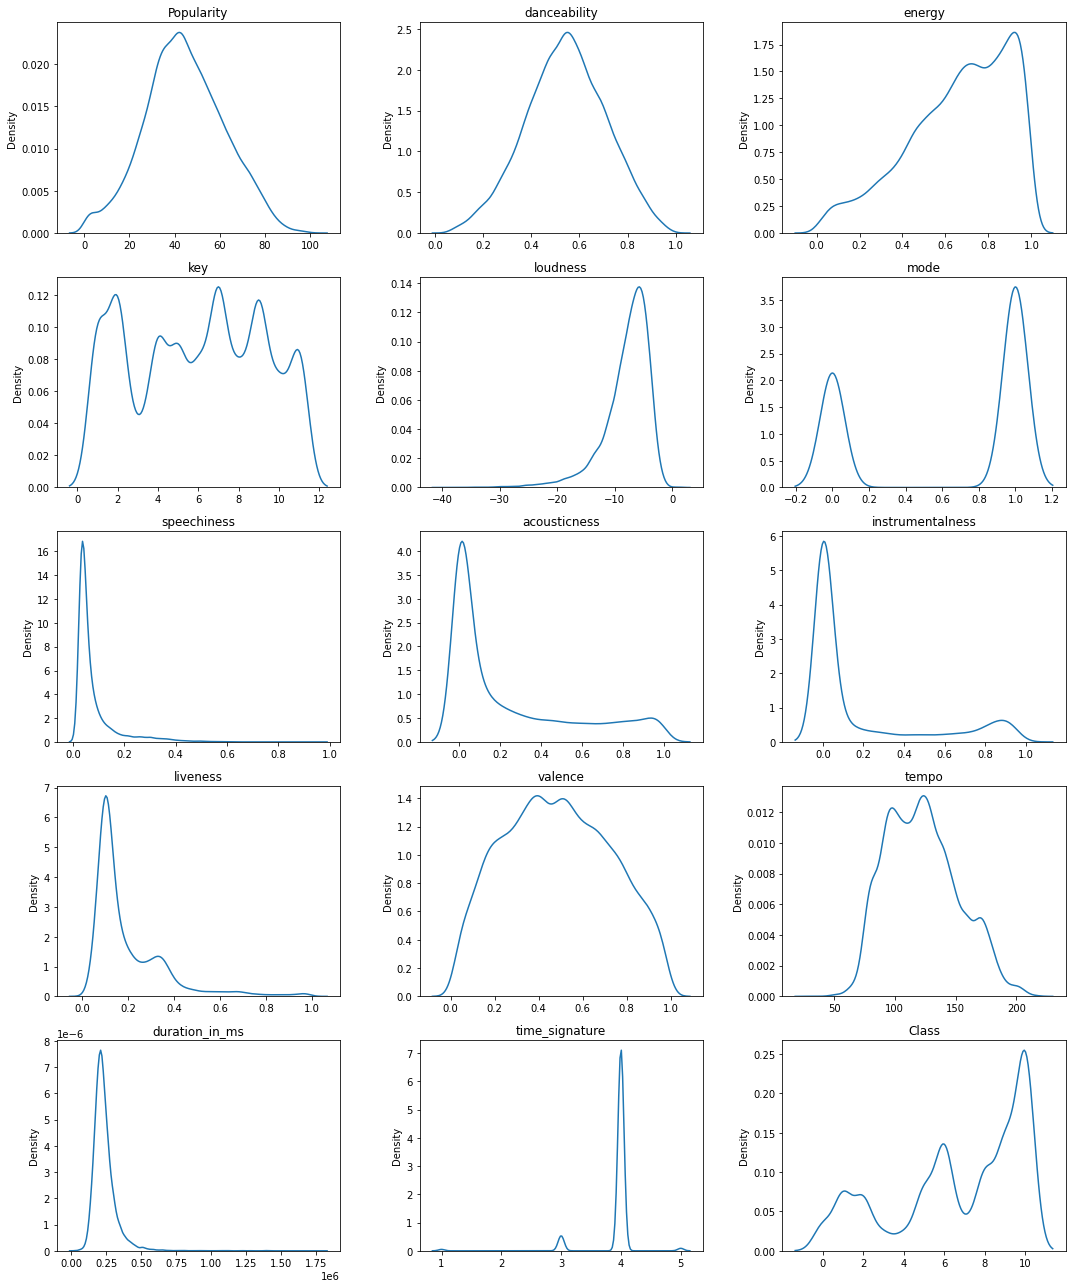

In [43]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.kdeplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

### Imputing NaN values
- Popularity and Key is normally distributed, so we'll use the mean to fill NA values. 
- instrumentalness seems to be positively skewed, so the median would be a good option to fill NA values

In [44]:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True)
df['key'].fillna(df['key'].mean(), inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].median(), inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17993 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       17993 non-null  object 
 1   Track Name        17993 non-null  object 
 2   Popularity        17993 non-null  float64
 3   danceability      17993 non-null  float64
 4   energy            17993 non-null  float64
 5   key               17993 non-null  float64
 6   loudness          17993 non-null  float64
 7   mode              17993 non-null  int64  
 8   speechiness       17993 non-null  float64
 9   acousticness      17993 non-null  float64
 10  instrumentalness  17993 non-null  float64
 11  liveness          17993 non-null  float64
 12  valence           17993 non-null  float64
 13  tempo             17993 non-null  float64
 14  duration_in_ms    17993 non-null  float64
 15  time_signature    17993 non-null  int64  
 16  Class             17993 non-null  int64 

In [46]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,Class
count,17993.000000,17993.000000,17993.000000,17993.000000,17993.000000,17993.000000,17993.000000,17993.00000,17993.000000,17993.000000,17993.000000,17993.000000,1.799300e+04,17993.000000,17993.000000
mean,44.508511,0.543444,0.662765,5.952625,-7.910629,0.636692,0.079706,0.24708,0.135348,0.196119,0.486172,122.622402,2.358326e+05,3.924026,6.695326
std,17.216948,0.166279,0.235390,3.012822,4.049361,0.480966,0.083580,0.31065,0.274809,0.159170,0.240190,29.572273,8.567863e+04,0.361647,3.206105
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.00000,0.000001,0.011900,0.018300,30.557000,2.332000e+04,1.000000,0.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.00430,0.000294,0.097500,0.297000,99.622000,1.876670e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,5.952625,-7.016000,1.000000,0.047400,0.08140,0.003910,0.129000,0.480000,120.065000,2.200000e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.43400,0.056600,0.258000,0.672000,141.969000,2.630890e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.99600,0.996000,1.000000,0.986000,217.416000,1.793160e+06,5.000000,10.000000


## Transformation

AttributeError: module 'stats' has no attribute 'probplot'

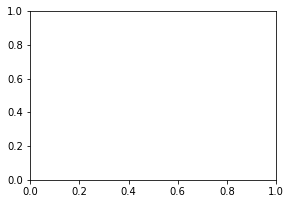

In [47]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        stats.probplot(df_dist[columns], dist='norm', plot=plt)
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

In [ ]:
df_skew = df.select_dtypes([int,float])

for i in df_skew.columns:
  print(f'{i} =',df_skew[i].skew())

Popularity = 0.06777414627473789
danceability = -0.0961869650526873
energy = -0.6518731644311702
key = -0.050918220494471735
loudness = -1.736490947677873
mode = -0.5791245597733639
speechiness = 3.0700693865792736
acousticness = 1.1078090783079868
instrumentalness = 1.9939522253795297
liveness = 2.181907031200821
valence = 0.08941067550293944
tempo = 0.37785914569844653
duration_in_ms = 4.264517276032171
time_signature = -4.216115447040947
Class = -0.6664557863042111


### Features with high skewness and are not normally distributed(Data points going beyond the line):
- loudness
- speechiness 
- acousticness 
- instrumentalness 
- liveness 
- duration_in_ms 
#### Note: A skewness value greater than 1 or less than -1 indicates a highly skewed distribution



In [ ]:
df["loudness"] = np.cbrt(df["loudness"]) 
df["speechiness"] = np.sqrt(df["speechiness"])
df["acousticness"] = np.sqrt(df["acousticness"])
df["instrumentalness"] = np.log(df["instrumentalness"]) 
df["liveness"] = np.log(df["liveness"]) 
df["duration_in_ms"] = np.log(df["duration_in_ms"])

## Distribution of features after transformation 

In [ ]:
df_dist_t = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax1 = plt.subplot(5,3,i) 
        ax1 = sns.kdeplot(x=df_dist[columns])
        ax2 = ax1.twinx()
        ax2 = sns.kdeplot(x=df_dist_t[columns], color='red')
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

### QQ plot after transformation 

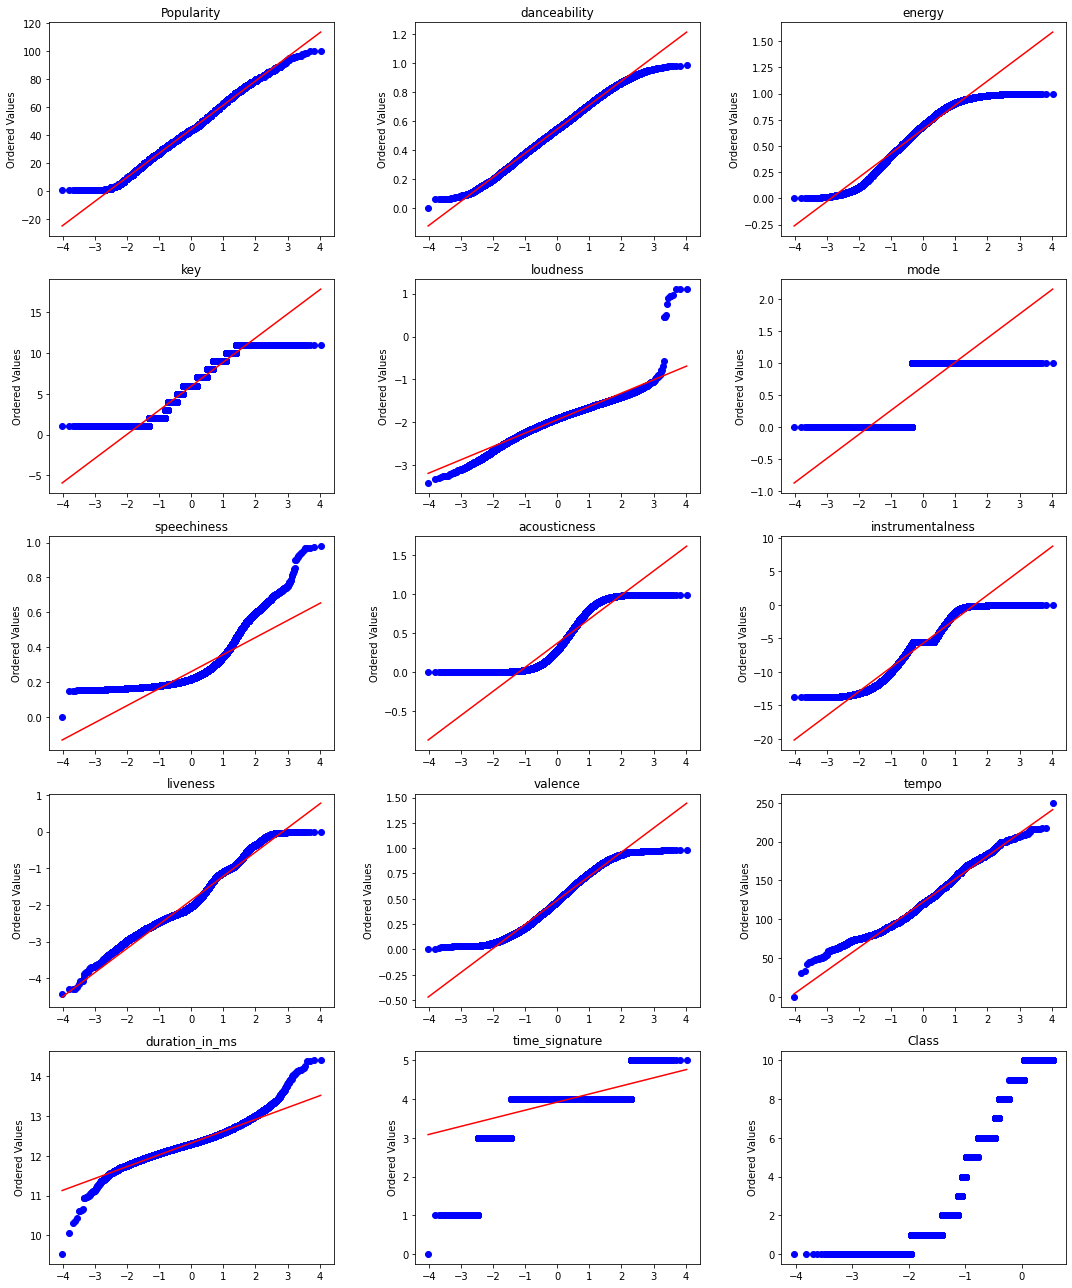

In [ ]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        stats.probplot(df_dist[columns], dist='norm', plot=plt)
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

In [ ]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-1.705862,1,0.220227,0.130767,-5.540389,-2.466281,0.8990,134.071,12.365620,4,5.0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-1.933657,1,0.201494,0.033166,-5.518964,-2.292635,0.5690,116.454,12.436124,4,10.0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-2.027455,1,0.229129,0.697137,-8.537396,-0.931404,0.7870,147.681,11.605204,4,6.0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-1.868931,0,0.235584,0.145602,-5.540389,-2.103734,0.5690,107.033,12.066627,4,5.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-1.623482,1,0.464758,0.013000,-4.128936,-1.760261,0.0918,199.060,12.345661,4,10.0


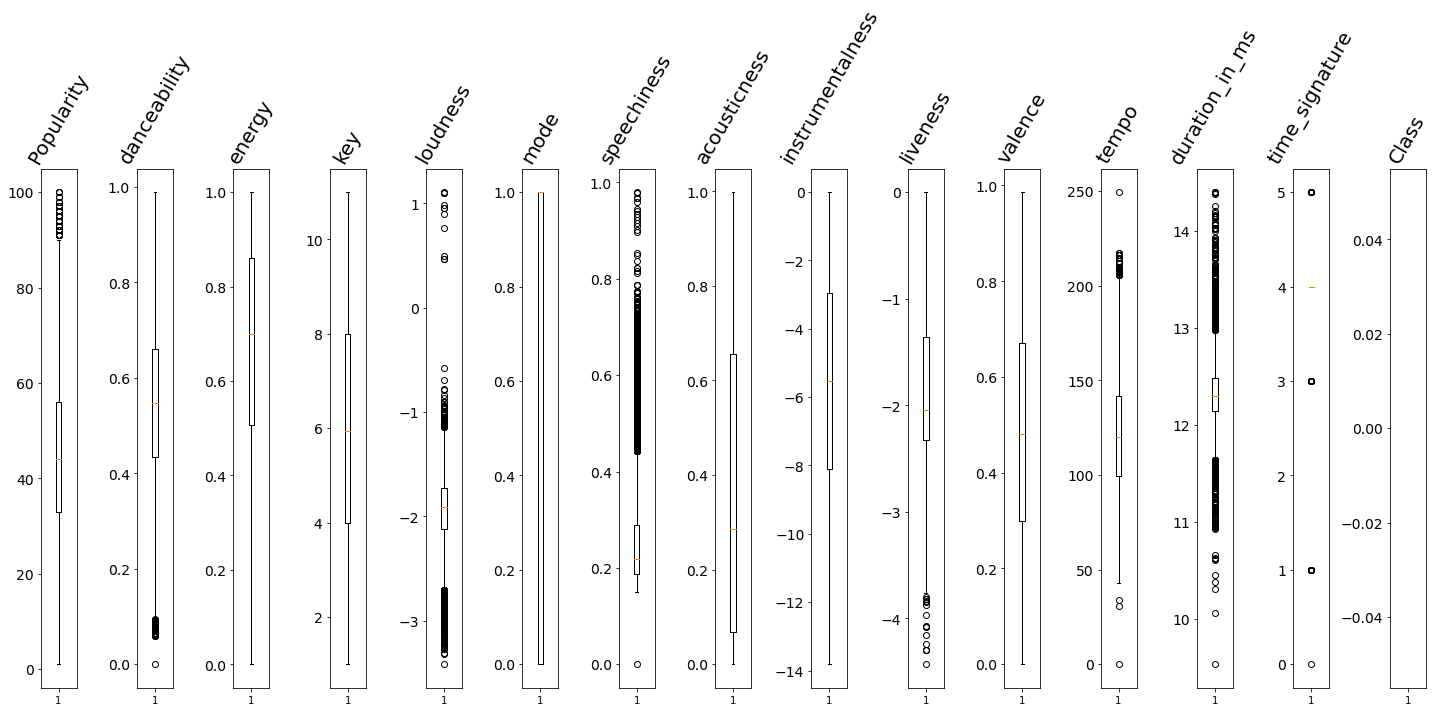

In [ ]:
df_box = df.select_dtypes([int,float])
fig, axs = plt.subplots(1, len(df_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_box.iloc[:,i])
    ax.set_title(df_box.columns[i], fontsize=20, rotation=60)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()


<AxesSubplot:>

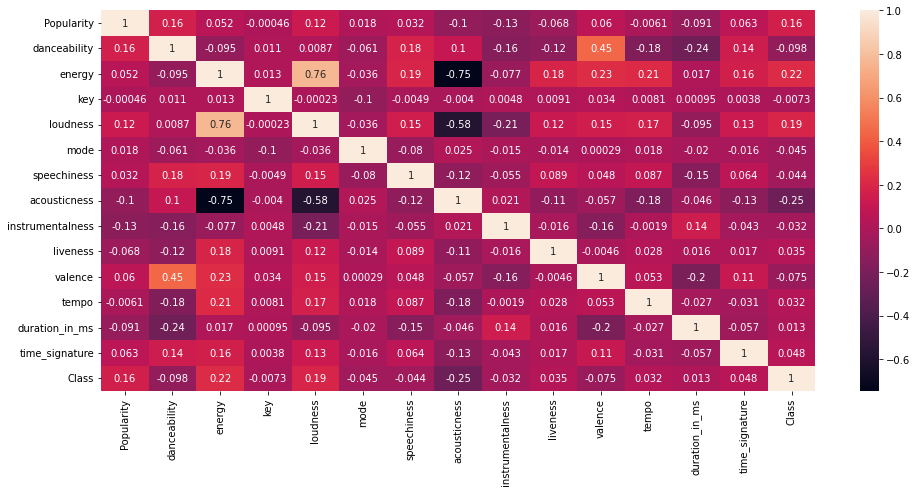

In [ ]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

#### It seems that there is no strong correlations between the target variable and the features 

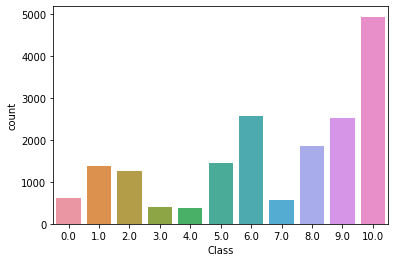

In [ ]:
# Number of classes
sns.countplot(data = df, x= df["Class"])
plt.show()

### Categorical data encoding

In [ ]:
columns = ["Artist Name","Track Name"]
enc = LabelEncoder()
for col in columns:
    df[col] = enc.fit_transform(df[col])

In [ ]:
df[["Artist Name","Track Name"]]

,Artist Name,Track Name
0,1470,15283
1,1353,6696
2,9766,10930
3,2447,9060
4,7813,10960
...,...,...
25703,3419,18061
25704,2704,19477
25706,8463,9730
25707,9218,8939


# feature engineering

In [ ]:
# Dropping columns we don't need 
del df["Track Name"]

In [ ]:
#Center and scale (i.e., standardize) all numeric features.
# define standard scaler
scaler = StandardScaler()
# transform data
df = scaler.fit_transform(df)
df